In [5]:
# Challenge 1 - Exploring the Data

import pandas as pd
import numpy as np

salaries = pd.read_csv('/Users/talia/Desktop/ironhack_labs/DAFT_0410/module_2/Lab_7_Hypothesis-Testing/Employees_advanced.csv')
salaries.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


In [6]:
salaries.isna().sum()

Name                     0
Job Titles               0
Department               0
Full or Part-Time        0
Salary or Hourly         0
Typical Hours        25161
Annual Salary         8022
Hourly Rate          25161
dtype: int64

In [7]:
(salaries["Salary or Hourly"]=="Hourly").value_counts()

False    25161
True      8022
Name: Salary or Hourly, dtype: int64

In [8]:
salaries.groupby("Department")["Name"].count()

Department
ADMIN HEARNG                39
ANIMAL CONTRL               81
AVIATION                  1629
BOARD OF ELECTION          107
BOARD OF ETHICS              8
BUDGET & MGMT               46
BUILDINGS                  269
BUSINESS AFFAIRS           171
CITY CLERK                  84
CITY COUNCIL               411
COMMUNITY DEVELOPMENT      207
COPA                       116
CULTURAL AFFAIRS            65
DISABILITIES                28
DoIT                        99
FAMILY & SUPPORT           615
FINANCE                    560
FIRE                      4641
GENERAL SERVICES           980
HEALTH                     488
HUMAN RELATIONS             16
HUMAN RESOURCES             79
INSPECTOR GEN               87
LAW                        407
LICENSE APPL COMM            1
MAYOR'S OFFICE              85
OEMC                      2102
POLICE                   13414
POLICE BOARD                 2
PROCUREMENT                 92
PUBLIC LIBRARY            1015
STREETS & SAN             21

In [9]:
# Challenge 2 - Hypothesis Tests

# test whether the hourly wage of all hourly workers is significantly different from $30/hr. 
# Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

salary_hourly = salaries[salaries["Salary or Hourly"]=="Hourly"]
salary_hourly

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86
6,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,F,Hourly,40.0,NaN,46.10
7,"ABBATE, JOSEPH L",POOL MOTOR TRUCK DRIVER,STREETS & SAN,F,Hourly,40.0,NaN,35.60
10,"ABBOTT, BETTY L",FOSTER GRANDPARENT,FAMILY & SUPPORT,P,Hourly,20.0,NaN,2.65
18,"ABDULLAH, LAKENYA N",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
...,...,...,...,...,...,...,...,...
33164,"ZUREK, FRANCIS",ELECTRICAL MECHANIC,OEMC,F,Hourly,40.0,NaN,46.10
33168,"ZWARYCZ MANN, IRENE A",CROSSING GUARD,OEMC,P,Hourly,20.0,NaN,17.68
33169,"ZWARYCZ, THOMAS J",POOL MOTOR TRUCK DRIVER,WATER MGMNT,F,Hourly,40.0,NaN,35.60
33174,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,F,Hourly,40.0,NaN,46.35


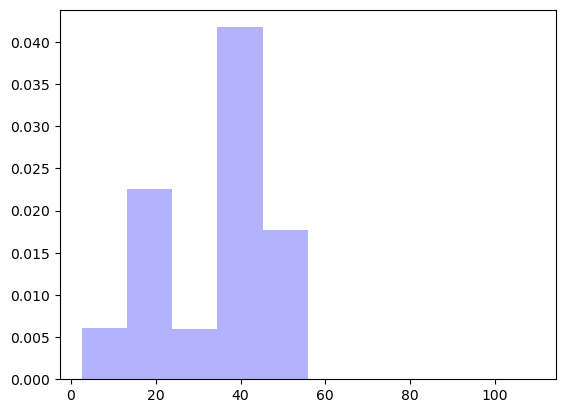

In [10]:
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt

m_hourly = salary_hourly["Hourly Rate"].mean()
s_hourly = salary_hourly["Hourly Rate"].std()/np.sqrt(len(salary_hourly["Hourly Rate"]))

plt.hist(salary_hourly["Hourly Rate"], alpha=.3, color='blue', density=True);

In [ ]:
# the hourly wage of all hourly workers is significantly different from $30/hr.

In [13]:
stats.t.interval(.95, df=len(salary_hourly["Hourly Rate"])-1, loc=m_hourly, scale=s_hourly)

(32.52345834488425, 33.05365708767623)

In [15]:
salaries[salaries["Department"]=="POLICE"]

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
9,"ABBATE, TERRY M",POLICE OFFICER,POLICE,F,Salary,NaN,93354.0,NaN
11,"ABDALLAH, ZAID",POLICE OFFICER,POLICE,F,Salary,NaN,84054.0,NaN
12,"ABDELHADI, ABDALMAHD",POLICE OFFICER,POLICE,F,Salary,NaN,87006.0,NaN
...,...,...,...,...,...,...,...,...
33177,"ZYGMUNT, DAWID",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33178,"ZYLINSKA, KATARZYNA",POLICE OFFICER,POLICE,F,Salary,NaN,72510.0,NaN
33179,"ZYMANTAS, LAURA C",POLICE OFFICER,POLICE,F,Salary,NaN,48078.0,NaN
33180,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,F,Salary,NaN,90024.0,NaN


In [31]:
avg_s_last_year = salaries.loc[salaries["Department"]=="POLICE",'Annual Salary'].mean()
std_s_last_year = salaries.loc[salaries["Department"]=="POLICE",'Annual Salary'].std()
(avg_s_last_year,std_s_last_year)

(86486.41450313339, 18272.228293992157)

In [29]:
avg_s_this_year = avg_s_last_year + 86000
avg_s_this_year

172486.4145031334

259.5192722248915

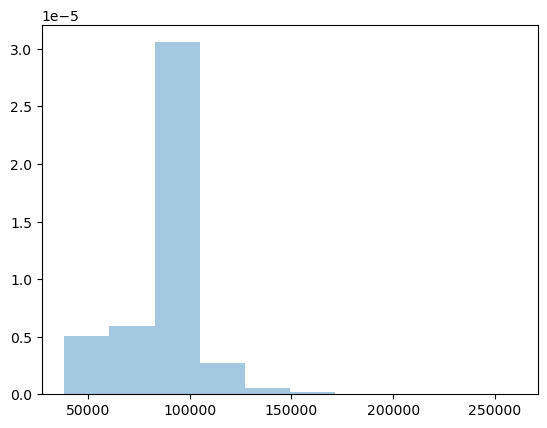

In [32]:
plt.hist(salaries.loc[salaries["Department"]=="POLICE",'Annual Salary'], alpha=.4, density=True);

alpha = 0.05  # significance level
t_crit = stats.t.ppf(1 - alpha, df=len(salaries.loc[salaries["Department"]=="POLICE",'Annual Salary'])-1)  # t-critical value
standard_error = std / np.sqrt(len(salaries.loc[salaries["Department"]=="POLICE",'Annual Salary']))  # standard error of the mean
point_estimate = 86000  # sample mean
margin_of_error = t_crit * standard_error  # margin of error
margin_of_error

In [36]:
# Using the `crosstab` function, find the department that has the most hourly workers. 

pd.crosstab([salaries['Department']], salaries.index, values = salaries[salaries["Salary or Hourly"]=="Hourly"], aggfunc=max)

#pd.crosstab([data['country']], data.index, values=data['movie_title'], aggfunc=len, margins=True, margins_name='Number of movies')[['Number of movies']][0:-1]

ValueError: Cannot set a DataFrame with multiple columns to the single column __dummy__